<a href="https://colab.research.google.com/github/trndnhan/UTI-Analysis-and-Binary-Classification/blob/main/notebooks/4_Modeling_(Part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries & data import

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import optuna
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Work/Data/transformed_urinalysis_tests.csv')
df

,Age,WBC,RBC,Gender,Color,Transparency,Glucose,Protein,pH,Specific_Gravity,Epithelial_Cells,Mucous_Threads,Amorphous_Urates,Bacteria,Diagnosis
0,1.358974,0.166667,0.0,0,4,0,4,4,0,1,4,6,3,4,0
1,-0.358974,0.166667,0.0,1,2,3,4,0,0,5,6,0,0,2,0
2,-0.282051,0.000000,0.0,1,4,3,4,5,0,5,6,0,2,6,0
3,1.384615,1.666667,298.0,1,1,1,4,0,1,3,6,6,3,0,0
4,0.153846,0.333333,0.0,0,9,2,4,5,1,4,6,6,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,-0.576923,0.000000,-1.0,1,9,0,4,4,1,2,6,0,3,6,0
1431,0.487179,-0.166667,0.0,1,9,0,4,4,2,1,6,3,3,6,0
1432,0.615385,0.500000,0.0,0,2,0,4,5,1,5,2,2,3,6,0
1433,0.871795,-0.166667,0.0,0,2,0,4,5,0,5,5,5,3,0,0


In [ ]:
x = df.loc[:, df.columns != 'Diagnosis']
y = df['Diagnosis']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
Counter(y_train)

Counter({0: 1089, 1: 59})

#Using SMOTE

In [ ]:
over = SMOTE(sampling_strategy=0.1, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [ ]:
x_train, y_train = pipeline.fit_resample(x_train, y_train)

In [ ]:
Counter(y_train)

Counter({0: 216, 1: 108})

# Scikit-learn

## Logistic Regression

In [ ]:
LOGmodel = LogisticRegression()
LOGmodel.fit(x_train, y_train)

y_pred_train = LOGmodel.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = LOGmodel.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       216
           1       0.82      0.65      0.73       108

    accuracy                           0.84       324
   macro avg       0.83      0.79      0.80       324
weighted avg       0.84      0.84      0.83       324


Confusion Matrix for Train Set:
[[201  15]
 [ 38  70]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       265
           1       0.38      0.55      0.44        22

    accuracy                           0.90       287
   macro avg       0.67      0.73      0.69       287
weighted avg       0.92      0.90      0.90       287


Confusion Matrix for Test Set:
[[245  20]
 [ 10  12]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def objective(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_float('C', 1e-5, 1e5, log=True)
    tol = trial.suggest_float('tol', 1e-6, 1e-2, log=True)

    model = LogisticRegression(penalty=penalty, C=C, tol=tol, solver='liblinear', max_iter=300)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)

    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-04-09 07:24:40,528] A new study created in memory with name: no-name-2b706453-cea6-46d9-b1dd-fb2b3aa19ff5
[I 2024-04-09 07:24:40,552] Trial 0 finished with value: 0.89198606271777 and parameters: {'penalty': 'l2', 'C': 1596.1779697064164, 'tol': 0.001554137978588464}. Best is trial 0 with value: 0.89198606271777.
[I 2024-04-09 07:24:40,572] Trial 1 finished with value: 0.9303135888501742 and parameters: {'penalty': 'l1', 'C': 0.07815688288423185, 'tol': 0.0018860075392893086}. Best is trial 1 with value: 0.9303135888501742.
[I 2024-04-09 07:24:40,588] Trial 2 finished with value: 0.8954703832752613 and parameters: {'penalty': 'l1', 'C': 0.8768457158497369, 'tol': 0.0012209652851081392}. Best is trial 1 with value: 0.9303135888501742.
[I 2024-04-09 07:24:40,601] Trial 3 finished with value: 0.9198606271777003 and parameters: {'penalty': 'l2', 'C': 0.0005980265633302319, 'tol': 1.1778056065506523e-06}. Best is trial 1 with value: 0.9303135888501742.
[I 2024-04-09 07:24:40,618] Tr

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.9373
  Params: 
    penalty: l1
    C: 0.06080105640504363
    tol: 0.00772393596137363


In [ ]:
best_params = best_trial.params
best_model = LogisticRegression(solver='liblinear', **best_params)
best_model.fit(x_train, y_train)

y_pred_train = best_model.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = best_model.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       216
           1       0.85      0.58      0.69       108

    accuracy                           0.83       324
   macro avg       0.84      0.77      0.79       324
weighted avg       0.83      0.83      0.82       324


Confusion Matrix for Train Set:
[[205  11]
 [ 45  63]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       265
           1       0.58      0.50      0.54        22

    accuracy                           0.93       287
   macro avg       0.77      0.73      0.75       287
weighted avg       0.93      0.93      0.93       287


Confusion Matrix for Test Set:
[[257   8]
 [ 11  11]]


In [ ]:
roc_auc_score(y_test, y_pred_test)

0.7349056603773585

In [ ]:
from sklearn.model_selection import cross_val_score

# Naive Bayes

In [ ]:
NBmodel = GaussianNB()
NBmodel.fit(x_train, y_train)

y_pred_train = NBmodel.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = NBmodel.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       216
           1       0.78      0.65      0.71       108

    accuracy                           0.82       324
   macro avg       0.81      0.78      0.79       324
weighted avg       0.82      0.82      0.82       324


Confusion Matrix for Train Set:
[[196  20]
 [ 38  70]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       265
           1       0.32      0.55      0.41        22

    accuracy                           0.88       287
   macro avg       0.64      0.73      0.67       287
weighted avg       0.91      0.88      0.89       287


Confusion Matrix for Test Set:
[[240  25]
 [ 10  12]]


In [ ]:
def objective(trial):
    var_smoothing = trial.suggest_float('var_smoothing', 1e-10, 1e-1, log=True)

    clf = GaussianNB(var_smoothing=var_smoothing)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-04-09 07:25:07,584] A new study created in memory with name: no-name-154eed8e-213b-4ac4-8f76-090de11bce22
[I 2024-04-09 07:25:07,610] Trial 0 finished with value: 0.8815331010452961 and parameters: {'var_smoothing': 9.843909709127791e-07}. Best is trial 0 with value: 0.8815331010452961.
[I 2024-04-09 07:25:07,641] Trial 1 finished with value: 0.8780487804878049 and parameters: {'var_smoothing': 3.991439246393811e-08}. Best is trial 0 with value: 0.8815331010452961.
[I 2024-04-09 07:25:07,663] Trial 2 finished with value: 0.8780487804878049 and parameters: {'var_smoothing': 3.1672402641033716e-10}. Best is trial 0 with value: 0.8815331010452961.
[I 2024-04-09 07:25:07,681] Trial 3 finished with value: 0.8780487804878049 and parameters: {'var_smoothing': 5.863833912498666e-09}. Best is trial 0 with value: 0.8815331010452961.
[I 2024-04-09 07:25:07,696] Trial 4 finished with value: 0.8780487804878049 and parameters: {'var_smoothing': 6.90583920233087e-10}. Best is trial 0 with val

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.9338
  Params: 
    var_smoothing: 0.0026884724463157907


In [ ]:
best_params = best_trial.params
best_model = GaussianNB(**best_params)
best_model.fit(x_train, y_train)

y_pred_train = best_model.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = best_model.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       216
           1       0.88      0.49      0.63       108

    accuracy                           0.81       324
   macro avg       0.84      0.73      0.75       324
weighted avg       0.82      0.81      0.79       324


Confusion Matrix for Train Set:
[[209   7]
 [ 55  53]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       265
           1       0.62      0.36      0.46        22

    accuracy                           0.93       287
   macro avg       0.78      0.67      0.71       287
weighted avg       0.92      0.93      0.93       287


Confusion Matrix for Test Set:
[[260   5]
 [ 14   8]]


In [ ]:
roc_auc_score(y_test, y_pred_test)

0.6723842195540309

## Decision Trees

In [ ]:
DTmodel = DecisionTreeClassifier()
DTmodel.fit(x_train, y_train)

y_pred_train = DTmodel.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = DTmodel.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       108

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324


Confusion Matrix for Train Set:
[[216   0]
 [  0 108]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       265
           1       0.24      0.59      0.34        22

    accuracy                           0.82       287
   macro avg       0.60      0.72      0.62       287
weighted avg       0.91      0.82      0.85       287


Confusion Matrix for Test Set:
[[223  42]
 [  9  13]]


In [ ]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 10, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None, 2])


    model = DecisionTreeClassifier(
        criterion='gini',
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)

    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-04-09 08:20:03,878] A new study created in memory with name: no-name-922dcc10-4def-466c-8a39-84d23c5928ce
[I 2024-04-09 08:20:03,921] Trial 0 finished with value: 0.8885017421602788 and parameters: {'max_depth': 22, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.8885017421602788.
[I 2024-04-09 08:20:03,948] Trial 1 finished with value: 0.9024390243902439 and parameters: {'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9024390243902439.
[I 2024-04-09 08:20:03,970] Trial 2 finished with value: 0.8989547038327527 and parameters: {'max_depth': 32, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9024390243902439.
[I 2024-04-09 08:20:03,997] Trial 3 finished with value: 0.8989547038327527 and parameters: {'max_depth': 22, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is tria

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.9268
  Params: 
    max_depth: 16
    min_samples_split: 3
    min_samples_leaf: 8
    max_features: None


In [ ]:
best_params = best_trial.params
best_model = DecisionTreeClassifier(criterion='gini', random_state=42, **best_params)
best_model.fit(x_train, y_train)

y_pred_train = best_model.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = best_model.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       216
           1       0.94      0.73      0.82       108

    accuracy                           0.90       324
   macro avg       0.91      0.85      0.87       324
weighted avg       0.90      0.90      0.89       324


Confusion Matrix for Train Set:
[[211   5]
 [ 29  79]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       265
           1       0.52      0.68      0.59        22

    accuracy                           0.93       287
   macro avg       0.75      0.81      0.77       287
weighted avg       0.94      0.93      0.93       287


Confusion Matrix for Test Set:
[[251  14]
 [  7  15]]


In [ ]:
roc_auc_score(y_test, y_pred_test)

0.8144939965694682

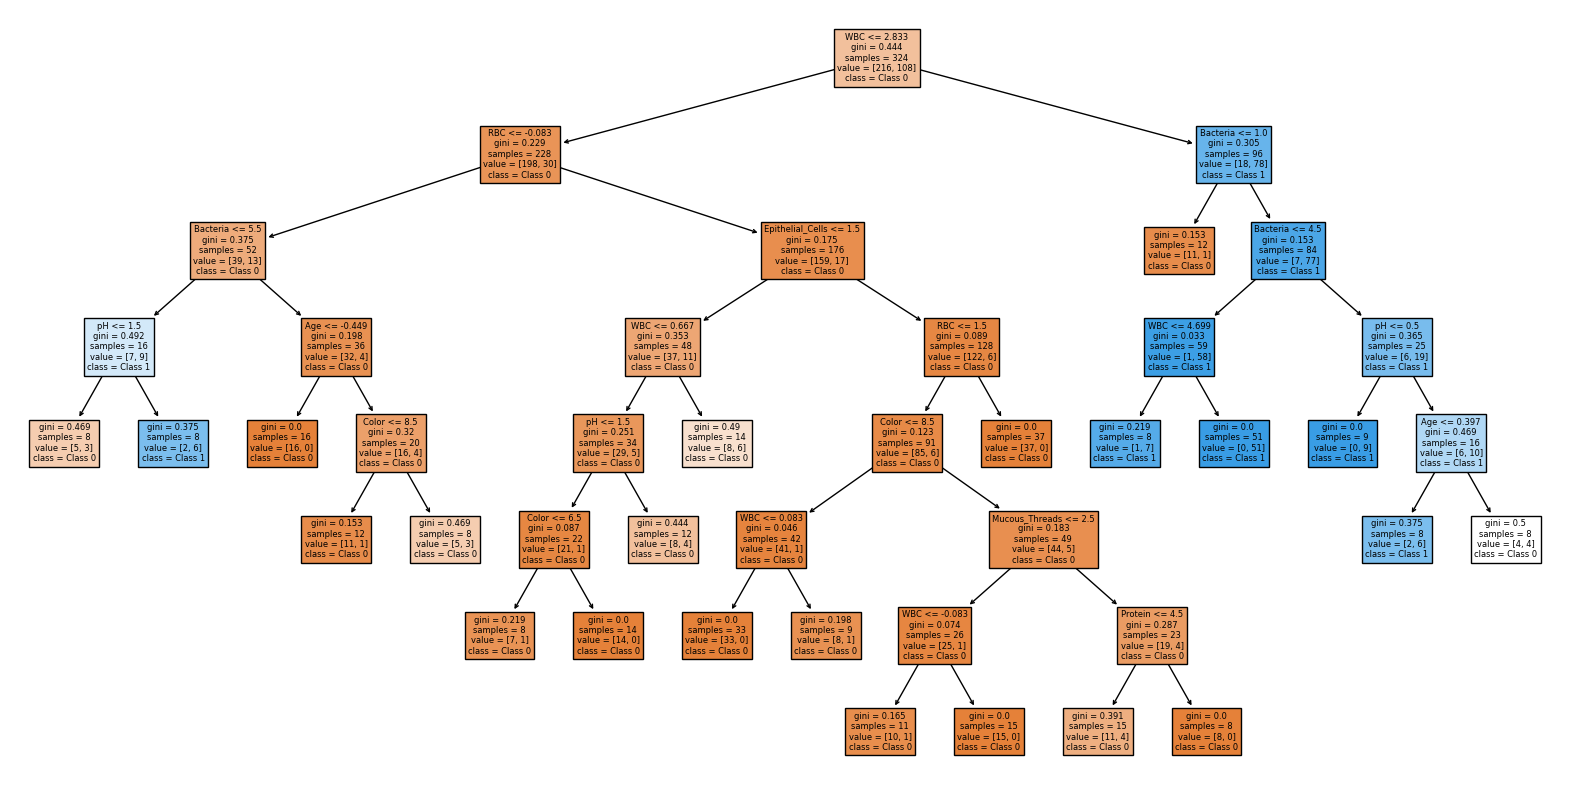

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=x_train.columns, class_names=['Class 0', 'Class 1'])
plt.show()

## Random Forests

In [ ]:
RFmodel = RandomForestClassifier()
RFmodel.fit(x_train, y_train)

y_pred_train = RFmodel.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = RFmodel.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       108

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324


Confusion Matrix for Train Set:
[[216   0]
 [  0 108]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       265
           1       0.60      0.68      0.64        22

    accuracy                           0.94       287
   macro avg       0.79      0.82      0.80       287
weighted avg       0.94      0.94      0.94       287


Confusion Matrix for Test Set:
[[255  10]
 [  7  15]]


In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 20, 150)
    max_depth = trial.suggest_int('max_depth', 10, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None, 2])


    model = RandomForestClassifier(
        class_weight={0: 1, 1: 3},
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        n_estimators=n_estimators,
        random_state=42
    )

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)

    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-04-09 07:25:56,571] A new study created in memory with name: no-name-ad37c230-c283-4b25-86f6-30c2ad9e9d34
[I 2024-04-09 07:25:56,821] Trial 0 finished with value: 0.8745644599303136 and parameters: {'n_estimators': 142, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8745644599303136.
[I 2024-04-09 07:25:56,968] Trial 1 finished with value: 0.9372822299651568 and parameters: {'n_estimators': 67, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 1 with value: 0.9372822299651568.
[I 2024-04-09 07:25:57,090] Trial 2 finished with value: 0.8362369337979094 and parameters: {'n_estimators': 58, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 2}. Best is trial 1 with value: 0.9372822299651568.
[I 2024-04-09 07:25:57,242] Trial 3 finished with value: 0.8850174216027874 and parameters: {'n_estimators': 81, 'max_depth': 12, 'min_samples

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.9477
  Params: 
    n_estimators: 80
    max_depth: 20
    min_samples_split: 5
    min_samples_leaf: 1
    max_features: sqrt


In [ ]:
best_params = best_trial.params
best_model = RandomForestClassifier(class_weight={0: 1, 1: 3}, random_state=42, **best_params)
best_model.fit(x_train, y_train)

y_pred_train = best_model.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = best_model.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       216
           1       0.98      0.98      0.98       108

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324


Confusion Matrix for Train Set:
[[214   2]
 [  2 106]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       265
           1       0.65      0.68      0.67        22

    accuracy                           0.95       287
   macro avg       0.81      0.83      0.82       287
weighted avg       0.95      0.95      0.95       287


Confusion Matrix for Test Set:
[[257   8]
 [  7  15]]


In [ ]:
roc_auc_score(y_test, y_pred_test)

0.8258147512864493

## Support Vector Machines

In [ ]:
SVCmodel = SVC()
SVCmodel.fit(x_train, y_train)

y_pred_train = SVCmodel.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = SVCmodel.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89       216
           1       0.89      0.57      0.70       108

    accuracy                           0.83       324
   macro avg       0.85      0.77      0.79       324
weighted avg       0.84      0.83      0.82       324


Confusion Matrix for Train Set:
[[208   8]
 [ 46  62]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       265
           1       0.40      0.36      0.38        22

    accuracy                           0.91       287
   macro avg       0.67      0.66      0.67       287
weighted avg       0.91      0.91      0.91       287


Confusion Matrix for Test Set:
[[253  12]
 [ 14   8]]


In [ ]:
def objective(trial):
    C = trial.suggest_float('C', 1e-5, 1e5, log=True)
    kernel = trial.suggest_categorical("kernel", ["poly", "rbf", "sigmoid"])


    model = SVC(
        class_weight={0: 1, 1: 3},
        C=C,
        kernel=kernel,
        random_state=42
    )

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)

    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-04-09 07:29:02,700] A new study created in memory with name: no-name-3c80becd-18d2-4b78-b09a-2e162b1192ea
[I 2024-04-09 07:29:02,751] Trial 0 finished with value: 0.08362369337979095 and parameters: {'C': 0.023952577346763797, 'kernel': 'poly'}. Best is trial 0 with value: 0.08362369337979095.
[I 2024-04-09 07:29:02,794] Trial 1 finished with value: 0.8222996515679443 and parameters: {'C': 231.31487136159404, 'kernel': 'rbf'}. Best is trial 1 with value: 0.8222996515679443.
[I 2024-04-09 07:29:02,915] Trial 2 finished with value: 0.7979094076655052 and parameters: {'C': 8099.58163881782, 'kernel': 'rbf'}. Best is trial 1 with value: 0.8222996515679443.
[I 2024-04-09 07:29:02,957] Trial 3 finished with value: 0.07665505226480836 and parameters: {'C': 0.030607407461569727, 'kernel': 'sigmoid'}. Best is trial 1 with value: 0.8222996515679443.
[I 2024-04-09 07:29:03,008] Trial 4 finished with value: 0.07665505226480836 and parameters: {'C': 0.00556954949151549, 'kernel': 'rbf'}. Be

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.9199
  Params: 
    C: 12.296724307475703
    kernel: poly


In [ ]:
best_params = best_trial.params
best_model = SVC(class_weight={0: 1, 1: 3},random_state=42, **best_params)
best_model.fit(x_train, y_train)

y_pred_train = best_model.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = best_model.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       216
           1       0.82      0.69      0.75       108

    accuracy                           0.85       324
   macro avg       0.84      0.81      0.82       324
weighted avg       0.84      0.85      0.84       324


Confusion Matrix for Train Set:
[[199  17]
 [ 33  75]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       265
           1       0.48      0.59      0.53        22

    accuracy                           0.92       287
   macro avg       0.72      0.77      0.74       287
weighted avg       0.93      0.92      0.92       287


Confusion Matrix for Test Set:
[[251  14]
 [  9  13]]


In [ ]:
roc_auc_score(y_test, y_pred_test)

0.7690394511149228

## K-Nearest Neighbors

In [ ]:
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(x_train, y_train)

y_pred_train = KNNmodel.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = KNNmodel.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       216
           1       0.86      0.82      0.84       108

    accuracy                           0.90       324
   macro avg       0.89      0.88      0.88       324
weighted avg       0.90      0.90      0.90       324


Confusion Matrix for Train Set:
[[202  14]
 [ 19  89]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       265
           1       0.27      0.59      0.37        22

    accuracy                           0.85       287
   macro avg       0.62      0.73      0.64       287
weighted avg       0.91      0.85      0.87       287


Confusion Matrix for Test Set:
[[230  35]
 [  9  13]]


In [ ]:
accuracy_scores = []

for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, pred_i))

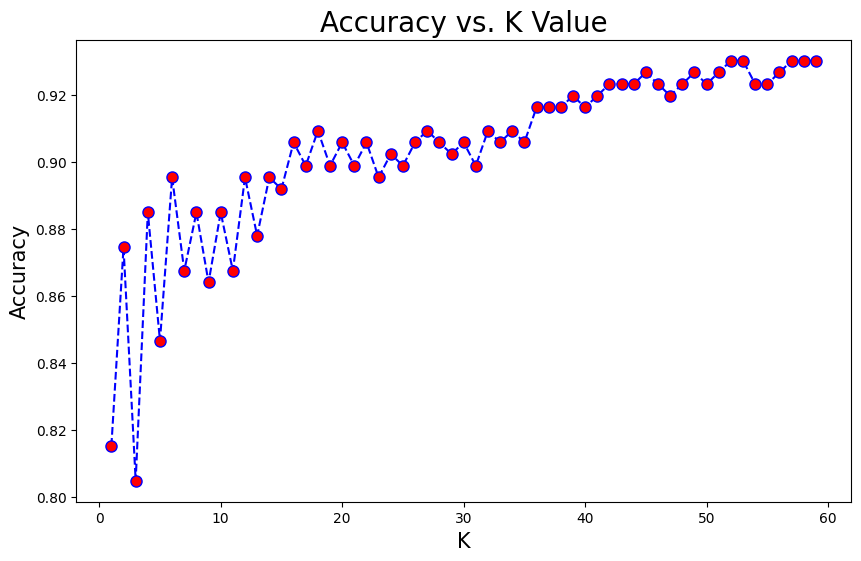

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 60), accuracy_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Accuracy vs. K Value', fontsize=20)
plt.xlabel('K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()

In [ ]:
def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 60)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'chebyshev'])
    leaf_size = trial.suggest_int('leaf_size', 10, 100)
    p = trial.suggest_int('p', 1, 5)
    n_jobs = trial.suggest_categorical('n_jobs', [-1, 1, 2, 4, 8])


    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        algorithm='auto',
        metric=metric,
        leaf_size=leaf_size,
        p=p,
        n_jobs=n_jobs
    )

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)

    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-04-09 07:29:21,938] A new study created in memory with name: no-name-b246c977-b19a-4012-9494-6ae2824754c2
[I 2024-04-09 07:29:22,034] Trial 0 finished with value: 0.8641114982578397 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'metric': 'euclidean', 'leaf_size': 59, 'p': 3, 'n_jobs': 8}. Best is trial 0 with value: 0.8641114982578397.
[I 2024-04-09 07:29:22,076] Trial 1 finished with value: 0.9233449477351916 and parameters: {'n_neighbors': 41, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 94, 'p': 4, 'n_jobs': 2}. Best is trial 1 with value: 0.9233449477351916.
[I 2024-04-09 07:29:22,119] Trial 2 finished with value: 0.9059233449477352 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 57, 'p': 1, 'n_jobs': 4}. Best is trial 1 with value: 0.9233449477351916.
[I 2024-04-09 07:29:22,163] Trial 3 finished with value: 0.8432055749128919 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'manhatta

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.9408
  Params: 
    n_neighbors: 46
    weights: distance
    metric: manhattan
    leaf_size: 18
    p: 5
    n_jobs: 1


In [ ]:
best_params = best_trial.params
best_model = KNeighborsClassifier(algorithm='auto', **best_params)
best_model.fit(x_train, y_train)

y_pred_train = best_model.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = best_model.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       108

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324


Confusion Matrix for Train Set:
[[216   0]
 [  0 108]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       265
           1       0.65      0.50      0.56        22

    accuracy                           0.94       287
   macro avg       0.80      0.74      0.77       287
weighted avg       0.94      0.94      0.94       287


Confusion Matrix for Test Set:
[[259   6]
 [ 11  11]]


In [ ]:
roc_auc_score(y_test, y_pred_test)

0.7386792452830189

## Gradient Boosting Machines

In [ ]:
GBmodel = GradientBoostingClassifier()
GBmodel.fit(x_train, y_train)

y_pred_train = GBmodel.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = GBmodel.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       216
           1       1.00      0.95      0.98       108

    accuracy                           0.98       324
   macro avg       0.99      0.98      0.98       324
weighted avg       0.98      0.98      0.98       324


Confusion Matrix for Train Set:
[[216   0]
 [  5 103]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       265
           1       0.48      0.68      0.57        22

    accuracy                           0.92       287
   macro avg       0.73      0.81      0.76       287
weighted avg       0.94      0.92      0.93       287


Confusion Matrix for Test Set:
[[249  16]
 [  7  15]]


In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    subsample = trial.suggest_float('subsample', 0.6, 1.0, log=True)
    max_features = trial.suggest_float('max_features', 0.6, 1.0, log=True)

    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        max_features=max_features
        )

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)

    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-04-09 07:29:54,255] A new study created in memory with name: no-name-3e725df2-bb73-40b2-a42f-634773485cdf
[I 2024-04-09 07:29:54,409] Trial 0 finished with value: 0.9477351916376306 and parameters: {'n_estimators': 122, 'learning_rate': 0.0034020581062825096, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 12, 'subsample': 0.9083384989860741, 'max_features': 0.8368061619773522}. Best is trial 0 with value: 0.9477351916376306.
[I 2024-04-09 07:29:54,477] Trial 1 finished with value: 0.9303135888501742 and parameters: {'n_estimators': 55, 'learning_rate': 0.014693433846225836, 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 17, 'subsample': 0.7389271544576926, 'max_features': 0.751969808894454}. Best is trial 0 with value: 0.9477351916376306.
[I 2024-04-09 07:29:54,701] Trial 2 finished with value: 0.9303135888501742 and parameters: {'n_estimators': 146, 'learning_rate': 0.010965207452690468, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 18

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.9547
  Params: 
    n_estimators: 59
    learning_rate: 0.00942960365477529
    max_depth: 4
    min_samples_split: 13
    min_samples_leaf: 4
    subsample: 0.9662391695759919
    max_features: 0.6489569238642884


In [ ]:
best_params = best_trial.params
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(x_train, y_train)

y_pred_train = best_model.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = best_model.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       216
           1       0.97      0.70      0.82       108

    accuracy                           0.90       324
   macro avg       0.92      0.85      0.87       324
weighted avg       0.90      0.90      0.89       324


Confusion Matrix for Train Set:
[[214   2]
 [ 32  76]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       265
           1       0.78      0.64      0.70        22

    accuracy                           0.96       287
   macro avg       0.87      0.81      0.84       287
weighted avg       0.96      0.96      0.96       287


Confusion Matrix for Test Set:
[[261   4]
 [  8  14]]


In [ ]:
roc_auc_score(y_test, y_pred_test)

0.8106346483704974

# XGBoost

In [ ]:
XGmodel = XGBClassifier()
XGmodel.fit(x_train, y_train)

y_pred_train = XGmodel.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = XGmodel.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       108

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324


Confusion Matrix for Train Set:
[[216   0]
 [  0 108]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       265
           1       0.48      0.68      0.57        22

    accuracy                           0.92       287
   macro avg       0.73      0.81      0.76       287
weighted avg       0.94      0.92      0.93       287


Confusion Matrix for Test Set:
[[249  16]
 [  7  15]]


In [ ]:
def objective(trial):
    reg_alpha = trial.suggest_float("reg_alpha", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 100, 1000, step=50)
    max_depth = trial.suggest_int("max_depth", 3, 15)
    learning_rate = trial.suggest_float("learning_rate", 0.0001, 0.1, log=True)
    gamma = trial.suggest_float('gamma', 0, 5)
    l1 = trial.suggest_float('lambda', 0, 2)
    l2 = trial.suggest_float('alpha', 0, 2)

    model = XGBClassifier(
        objective = 'binary:logistic',
        reg_alpha=reg_alpha,
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        gamma=gamma,
        reg_lambda=l1,
        alpha=l2,
        random_state = 42
        )

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)

    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-04-09 07:31:58,305] A new study created in memory with name: no-name-27dd9d6b-2d28-4a72-a332-fea5537624ba
[I 2024-04-09 07:31:58,685] Trial 0 finished with value: 0.9233449477351916 and parameters: {'reg_alpha': 0.2559427496003147, 'n_estimators': 850, 'max_depth': 10, 'learning_rate': 0.000226578001306302, 'gamma': 1.3690644912748873, 'lambda': 0.8709538132113002, 'alpha': 1.7579576122004892}. Best is trial 0 with value: 0.9233449477351916.
[I 2024-04-09 07:31:58,864] Trial 1 finished with value: 0.9233449477351916 and parameters: {'reg_alpha': 0.5531991610324768, 'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.0006707797842995717, 'gamma': 2.6358574429135144, 'lambda': 0.8411741930901562, 'alpha': 0.7450418485030954}. Best is trial 0 with value: 0.9233449477351916.
[I 2024-04-09 07:31:59,176] Trial 2 finished with value: 0.9407665505226481 and parameters: {'reg_alpha': 0.48962254083996737, 'n_estimators': 650, 'max_depth': 15, 'learning_rate': 0.054946327080243294, '

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.9512
  Params: 
    reg_alpha: 0.3069059937405213
    n_estimators: 700
    max_depth: 6
    learning_rate: 0.0009902885160053942
    gamma: 0.08145843854983292
    lambda: 1.6551035395467457
    alpha: 1.499811272697868


In [ ]:
best_params = best_trial.params
best_model = XGBClassifier(objective = 'binary:logistic', random_state = 42, **best_params)
best_model.fit(x_train, y_train)

y_pred_train = best_model.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = best_model.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       216
           1       0.95      0.71      0.81       108

    accuracy                           0.89       324
   macro avg       0.91      0.85      0.87       324
weighted avg       0.90      0.89      0.89       324


Confusion Matrix for Train Set:
[[212   4]
 [ 31  77]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       265
           1       0.70      0.64      0.67        22

    accuracy                           0.95       287
   macro avg       0.84      0.81      0.82       287
weighted avg       0.95      0.95      0.95       287


Confusion Matrix for Test Set:
[[259   6]
 [  8  14]]


In [ ]:
roc_auc_score(y_test, y_pred_test)

0.806861063464837

## Light Gradient Boosting Machine

In [ ]:
LGmodel = LGBMClassifier()
LGmodel.fit(x_train, y_train)

y_pred_train = LGmodel.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = LGmodel.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)

[LightGBM] [Info] Number of positive: 108, number of negative: 216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 324, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
def objective(trial):
    boosting_type = trial.suggest_categorical("boosting_type", ["gbdt", "dart", "rf"])
    num_leaves = trial.suggest_int('num_leaves', 2, 256)
    n_estimators = trial.suggest_int('n_estimators', 50, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 32)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5, log=True)
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100)
    lambda_l1 = trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True)
    lambda_l2 = trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True)

    model = LGBMClassifier(
        objective = 'binary',
        data_sample_strategy = 'goss',
        verbosity = -1,
        boosting_type=boosting_type,
        num_leaves=num_leaves,
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_samples=min_child_samples,
        lambda_l1=lambda_l1,
        lambda_l2=lambda_l2,
        random_state = 42
        )

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)

    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-04-09 07:33:34,989] A new study created in memory with name: no-name-b981eccb-2adc-40f9-bc3d-fe64e311ad4a
[I 2024-04-09 07:33:35,092] Trial 0 finished with value: 0.8466898954703833 and parameters: {'boosting_type': 'rf', 'num_leaves': 76, 'n_estimators': 310, 'max_depth': 22, 'learning_rate': 0.4118519704287047, 'min_child_samples': 80, 'lambda_l1': 0.7467575698991528, 'lambda_l2': 0.8661793730889338}. Best is trial 0 with value: 0.8466898954703833.
[I 2024-04-09 07:33:35,138] Trial 1 finished with value: 0.7770034843205574 and parameters: {'boosting_type': 'dart', 'num_leaves': 247, 'n_estimators': 592, 'max_depth': 32, 'learning_rate': 0.3048782411429512, 'min_child_samples': 89, 'lambda_l1': 1.021825997411569e-05, 'lambda_l2': 2.1009145876983356e-06}. Best is trial 0 with value: 0.8466898954703833.
[I 2024-04-09 07:33:35,238] Trial 2 finished with value: 0.9163763066202091 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 140, 'n_estimators': 402, 'max_depth': 11, 'le

In [ ]:
best_trial = study.best_trial

print('Best trial:')
print('  Value: {:.4f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

Best trial:
  Value: 0.9477
  Params: 
    boosting_type: rf
    num_leaves: 128
    n_estimators: 317
    max_depth: 15
    learning_rate: 0.01745065094927489
    min_child_samples: 8
    lambda_l1: 1.1943989195918434e-05
    lambda_l2: 0.031956613822870905


In [ ]:
best_params = best_trial.params
best_model = LGBMClassifier(objective = 'binary', data_sample_strategy = 'goss', verbosity = -1, random_state = 42, **best_params)
best_model.fit(x_train, y_train)

y_pred_train = best_model.predict(x_train)

print('\nClassification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print('\nConfusion Matrix for Train Set:')
print(conf_matrix_train)

y_pred_test = best_model.predict(x_test)

print('\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print('\nConfusion Matrix for Test Set:')
print(conf_matrix_test)


Classification Report for Train Set:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       216
           1       0.92      0.71      0.80       108

    accuracy                           0.88       324
   macro avg       0.89      0.84      0.86       324
weighted avg       0.89      0.88      0.88       324


Confusion Matrix for Train Set:
[[209   7]
 [ 31  77]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       265
           1       0.67      0.64      0.65        22

    accuracy                           0.95       287
   macro avg       0.82      0.80      0.81       287
weighted avg       0.95      0.95      0.95       287


Confusion Matrix for Test Set:
[[258   7]
 [  8  14]]


In [ ]:
roc_auc_score(y_test, y_pred_test)

0.8049742710120068